In [3]:
!pip install pandas numpy matplotlib seaborn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Make plots prettier
sns.set_style('whitegrid')


In [7]:
# Replace the filename with the correct name you saved
df = pd.read_csv('dataset_part_2.csv')

# Check first few rows
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


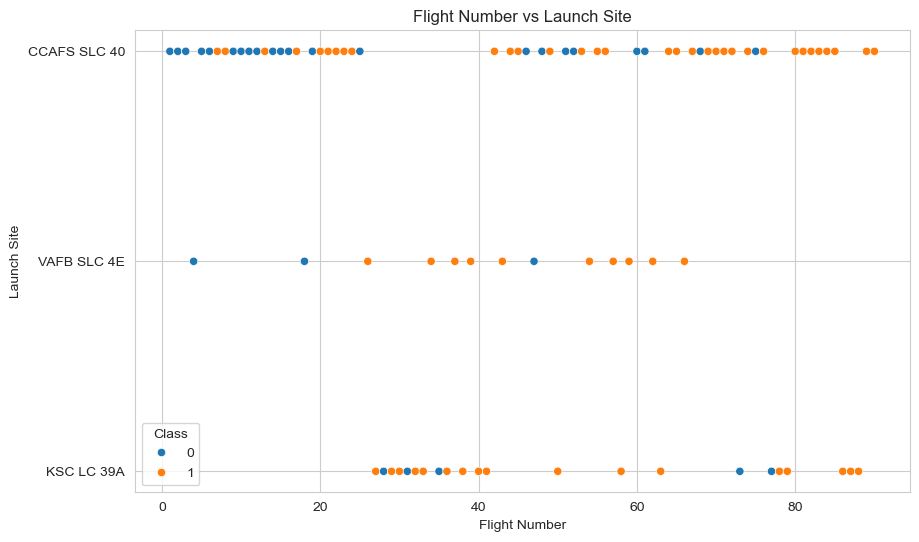

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()


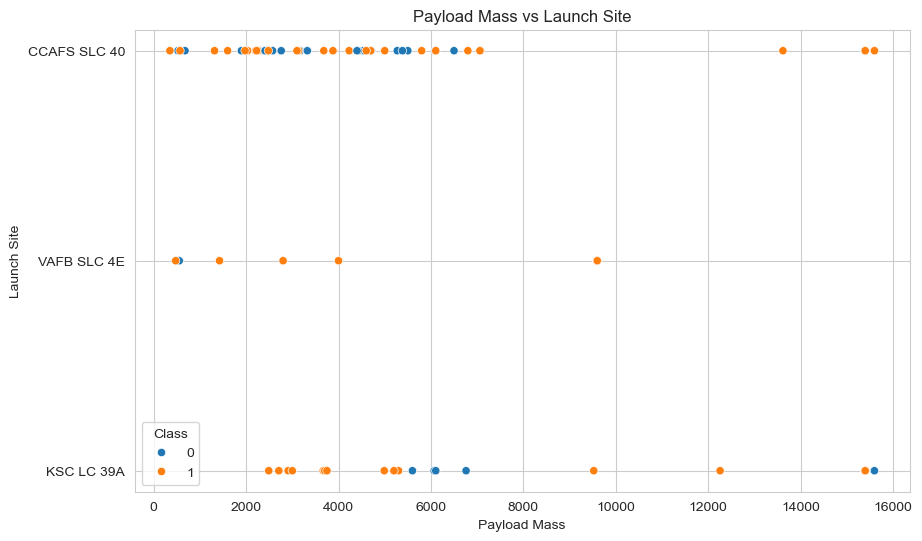

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.show()


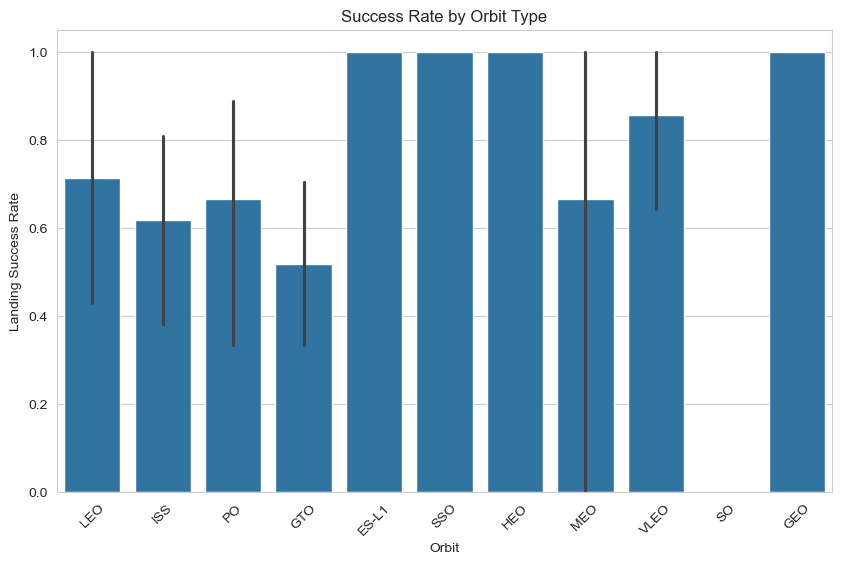

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=df)
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Landing Success Rate')
plt.xticks(rotation=45)
plt.show()


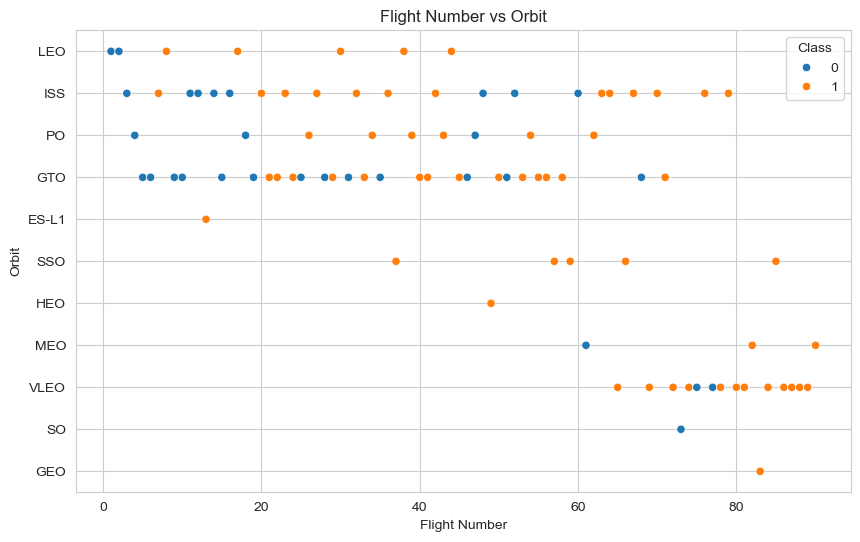

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.title('Flight Number vs Orbit')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.show()


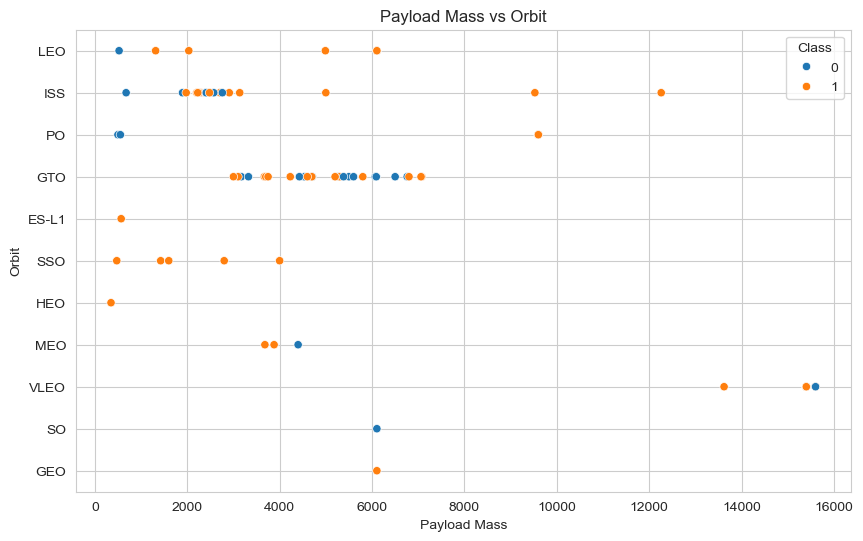

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.title('Payload Mass vs Orbit')
plt.xlabel('Payload Mass')
plt.ylabel('Orbit')
plt.show()


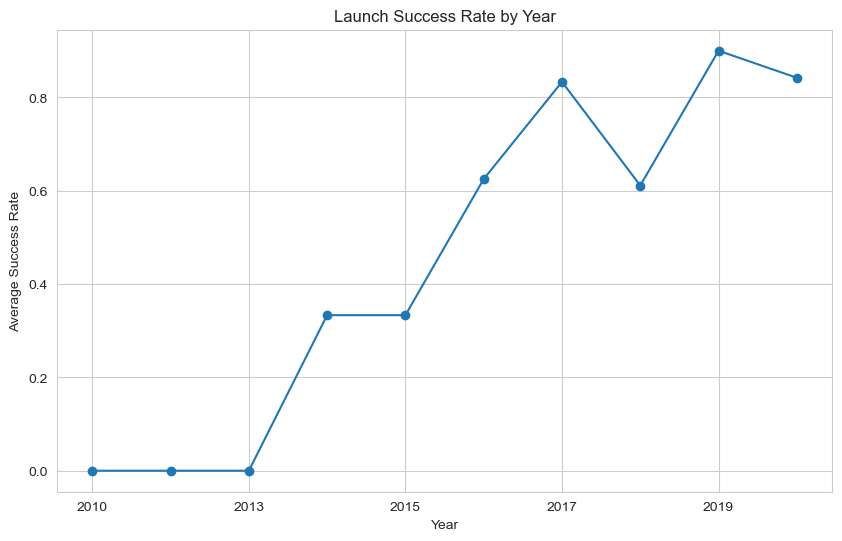

In [19]:
# Step 1: Extract year from Date
year = []

def Extract_year():
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year

Extract_year()

# Add 'Year' column to dataframe
df['Year'] = year

# Step 2: Group by year and calculate average success (mean of Class)
yearly_success = df.groupby('Year')['Class'].mean()

# Step 3: Plot it
plt.figure(figsize=(10,6))
yearly_success.plot(marker='o')
plt.title('Launch Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()


In [21]:
# Select relevant features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply one-hot encoding to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Check the first few rows
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Convert all features to float64
features_one_hot = features_one_hot.astype('float64')

# Save to CSV (optional, if asked)
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Confirm
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
